In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [44]:
# check for missing data
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [45]:
# check data types
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [46]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [47]:
df["person_age"] = df["person_age"].astype('int')
df = df[df["person_income"]<= 100000.00]
df = df[df["person_age"] <= 100]

In [48]:
df["person_age"] = df["person_age"].astype('int')

numerical_columns = [var for var in df.columns if df[var].dtype in("float64","int64")]
categorical_columns = [var for var in df.columns if df[var].dtype not in("float64","int64")]
print(f"Numerical columns: {numerical_columns}")
print(f"\nCategorical columns: {categorical_columns}")

Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [49]:
for col in numerical_columns:
    print(f"the mininmum value in {col} column is {df[col].min()}")
    print(f"the maximum value in {col} column is {df[col].max()}")

the mininmum value in person_age column is 20
the maximum value in person_age column is 94
the mininmum value in person_income column is 8000.0
the maximum value in person_income column is 99997.0
the mininmum value in person_emp_exp column is 0
the maximum value in person_emp_exp column is 76
the mininmum value in loan_amnt column is 500.0
the maximum value in loan_amnt column is 35000.0
the mininmum value in loan_int_rate column is 5.42
the maximum value in loan_int_rate column is 20.0
the mininmum value in loan_percent_income column is 0.01
the maximum value in loan_percent_income column is 0.66
the mininmum value in cb_person_cred_hist_length column is 2.0
the maximum value in cb_person_cred_hist_length column is 30.0
the mininmum value in credit_score column is 390
the maximum value in credit_score column is 784
the mininmum value in loan_status column is 0
the maximum value in loan_status column is 1


- We have some persons with age above 100 and a max age of 144 which is a possible outlier
- We have a maximum income of 7200766 which might lead to skewness in our data

In [50]:
df["person_income"].value_counts().sort_index(ascending=False).head(29)


person_income
99997.0    1
99986.0    1
99984.0    1
99977.0    1
99969.0    1
99955.0    1
99941.0    1
99940.0    1
99919.0    1
99907.0    1
99895.0    1
99891.0    1
99874.0    1
99870.0    1
99856.0    1
99850.0    1
99841.0    1
99832.0    1
99820.0    1
99814.0    1
99790.0    2
99779.0    1
99773.0    2
99770.0    1
99764.0    1
99758.0    1
99757.0    1
99750.0    1
99732.0    1
Name: count, dtype: int64

In [51]:
print("min income: ",df["person_income"].min())
print("max income: ",df["person_income"].max())
print("avergare income: ",df["person_income"].mean())

min income:  8000.0
max income:  99997.0
avergare income:  58890.714302052955


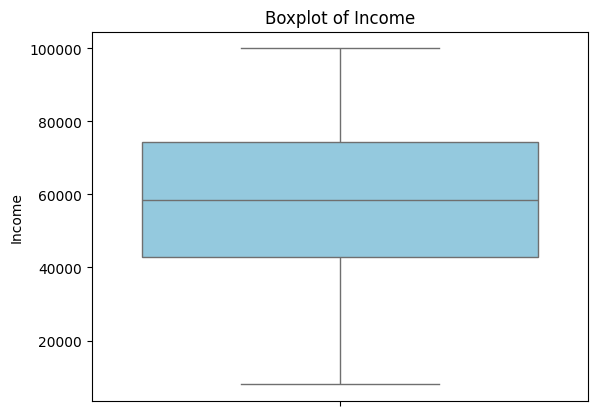

In [52]:
sns.boxplot(y=df['person_income'], color='skyblue')
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()

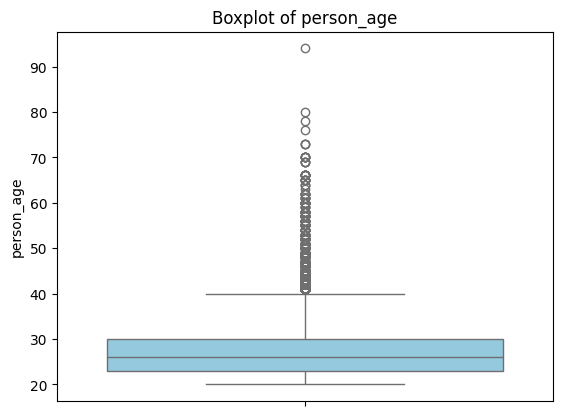

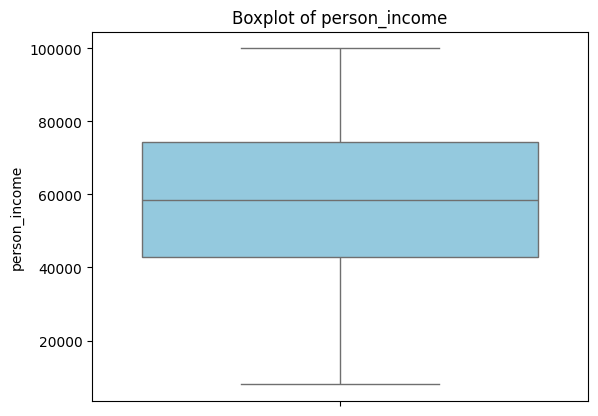

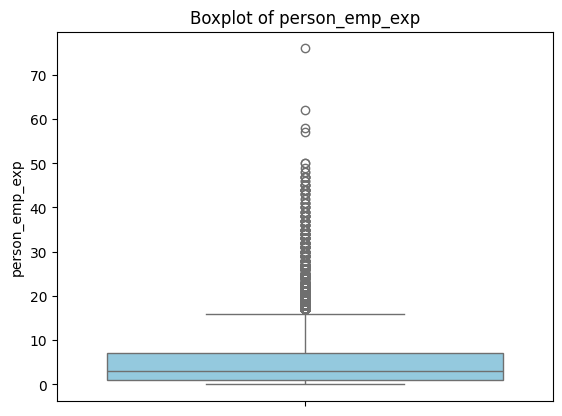

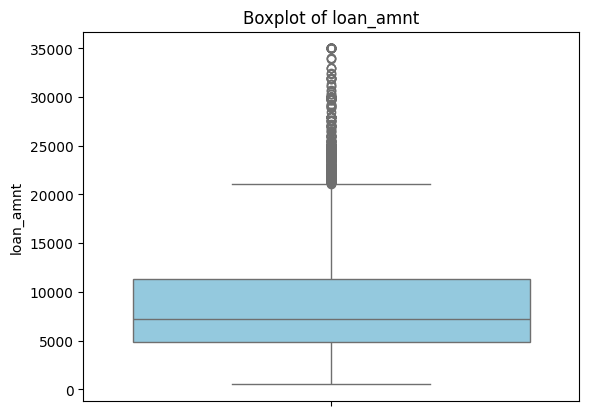

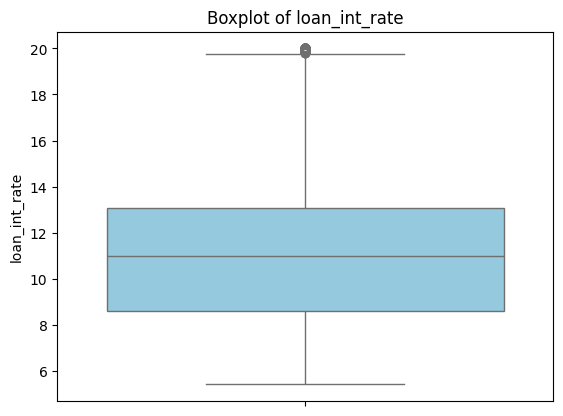

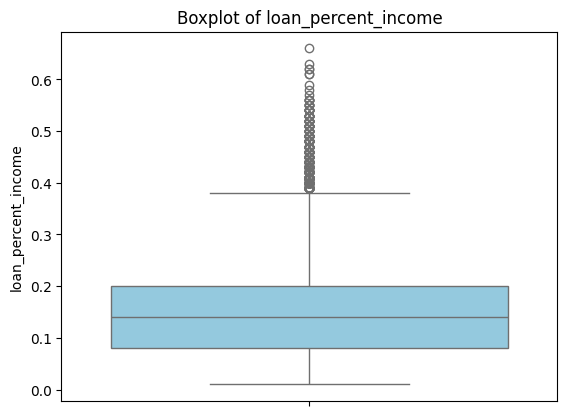

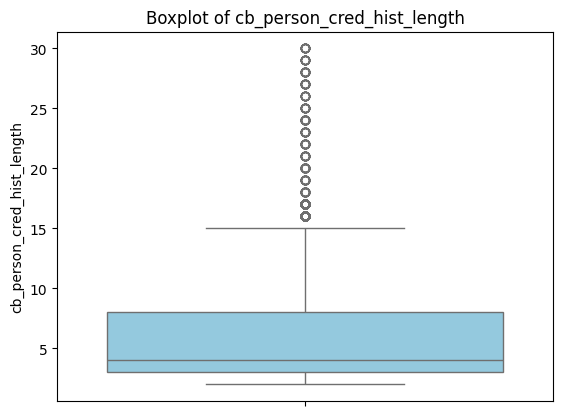

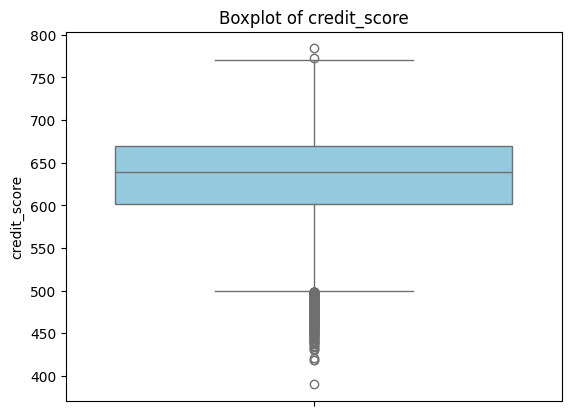

In [76]:
for col in numerical_columns[:-1]:
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()

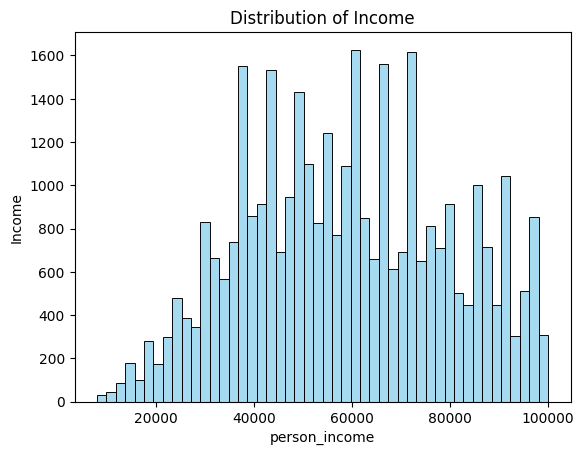

In [53]:
sns.histplot(x=df['person_income'], color='skyblue')
plt.title('Distribution of Income')
plt.ylabel('Income')
plt.show()

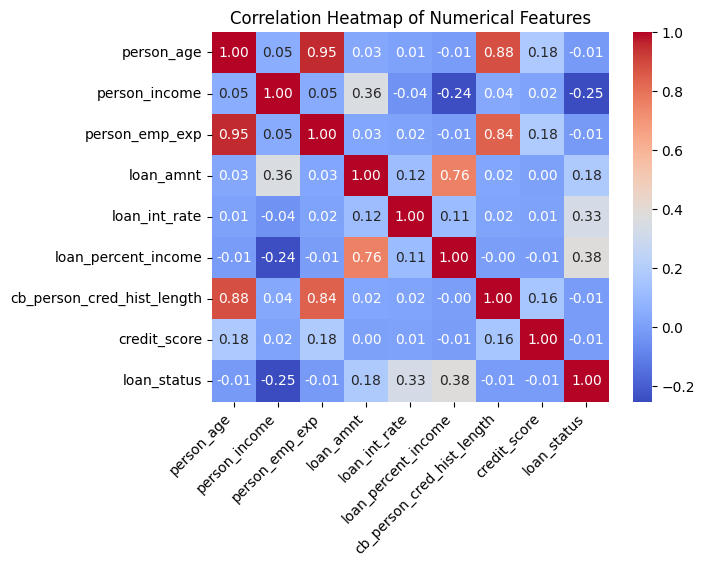

In [54]:
df_correlation = df[numerical_columns].corr()
sns.heatmap(df_correlation,annot= True,fmt=".2f",cmap="coolwarm")

plt.title("Correlation Heatmap of Numerical Features")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show();

# Descreptive Insights EDA

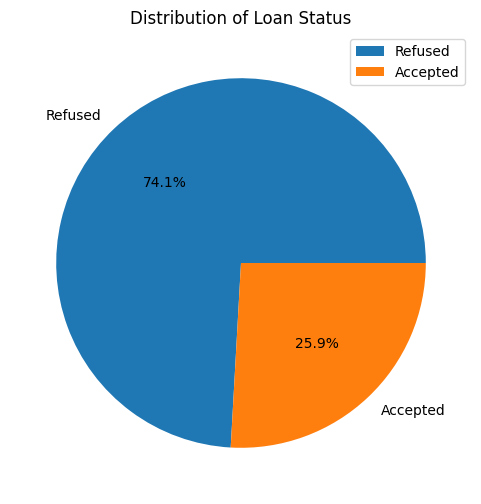

In [73]:

counts = df["loan_status"].value_counts()
custom_labels = ['Accepted' if x==1 else 'Refused' for x in counts.index]

#plot a pie chart 
plt.figure(figsize=(6,6))
plt.pie(counts,labels=custom_labels,autopct='%1.1f%%')

#add title
plt.title("Distribution of Loan Status")

plt.legend(loc="best")
plt.show()

## Applicant Demographic

In [55]:
df_accepted = df[df["loan_status"] == 1]
df_refused = df[df["loan_status"] == 0]
df.shape[0] , df_accepted.shape[0],df_refused.shape[0]

(34974, 9054, 25920)

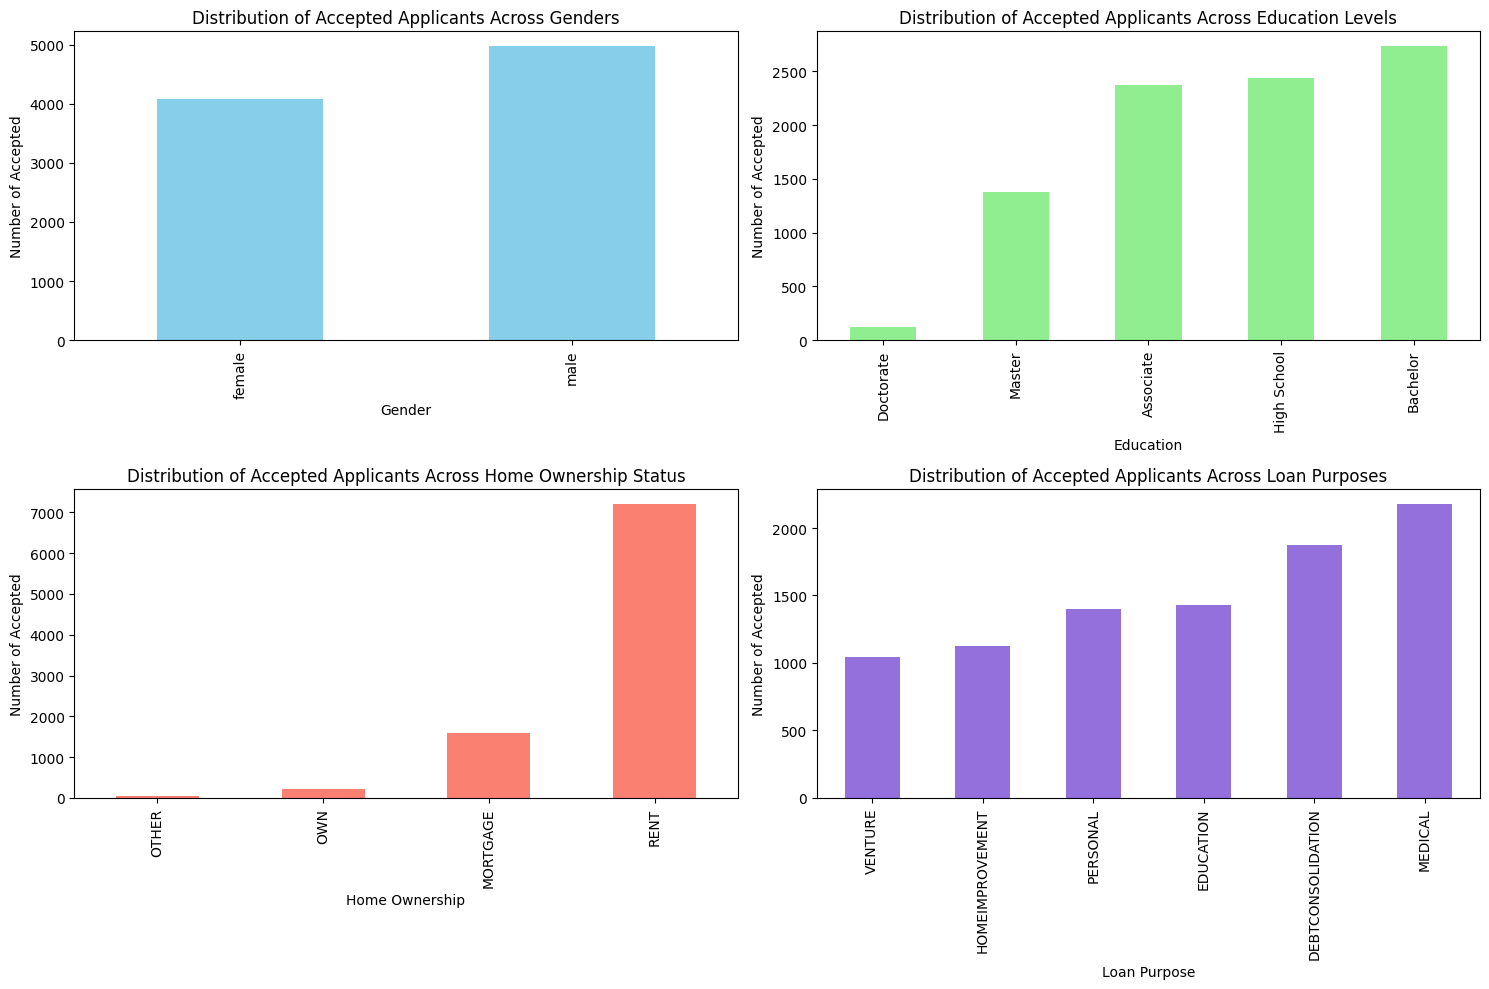

In [56]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
# Gender
df_accepted.groupby("person_gender").size().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Accepted")
axes[0].set_title("Distribution of Accepted Applicants Across Genders")

# Education
df_accepted.groupby("person_education").size().sort_values().plot(
    kind='bar', ax=axes[1], color='lightgreen'
)
axes[1].set_xlabel("Education")
axes[1].set_ylabel("Number of Accepted")
axes[1].set_title("Distribution of Accepted Applicants Across Education Levels")

# Home Ownership
df_accepted.groupby("person_home_ownership").size().sort_values().plot(
    kind='bar', ax=axes[2], color='salmon'
)
axes[2].set_xlabel("Home Ownership")
axes[2].set_ylabel("Number of Accepted")
axes[2].set_title("Distribution of Accepted Applicants Across Home Ownership Status")

# Loan Purpose
df_accepted.groupby("loan_intent").size().sort_values().plot(
    kind='bar', ax=axes[3], color='mediumpurple'
)
axes[3].set_xlabel("Loan Purpose")
axes[3].set_ylabel("Number of Accepted")
axes[3].set_title("Distribution of Accepted Applicants Across Loan Purposes")


plt.tight_layout()
plt.show()


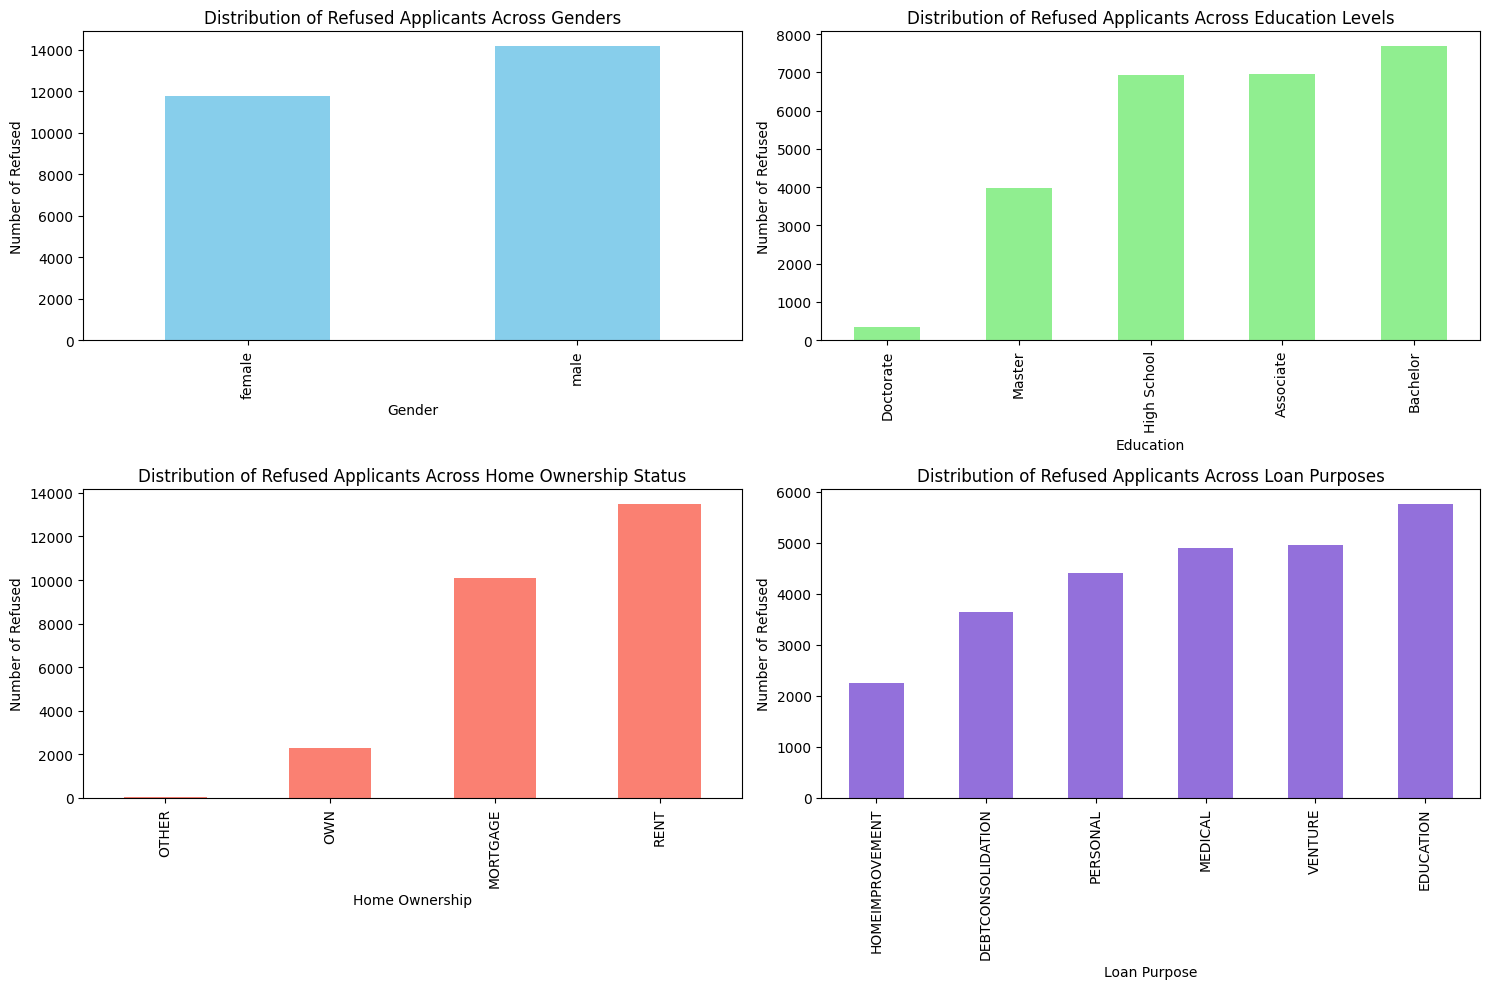

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  
# Gender
df_refused.groupby("person_gender").size().plot(
    kind='bar', ax=axes[0], color='skyblue'
)
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Number of Refused")
axes[0].set_title("Distribution of Refused Applicants Across Genders")

# Education
df_refused.groupby("person_education").size().sort_values().plot(
    kind='bar', ax=axes[1], color='lightgreen'
)
axes[1].set_xlabel("Education")
axes[1].set_ylabel("Number of Refused")
axes[1].set_title("Distribution of Refused Applicants Across Education Levels")

# Home Ownership
df_refused.groupby("person_home_ownership").size().sort_values().plot(
    kind='bar', ax=axes[2], color='salmon'
)
axes[2].set_xlabel("Home Ownership")
axes[2].set_ylabel("Number of Refused")
axes[2].set_title("Distribution of Refused Applicants Across Home Ownership Status")

# Loan Purpose
df_refused.groupby("loan_intent").size().sort_values().plot(
    kind='bar', ax=axes[3], color='mediumpurple'
)
axes[3].set_xlabel("Loan Purpose")
axes[3].set_ylabel("Number of Refused")
axes[3].set_title("Distribution of Refused Applicants Across Loan Purposes")

plt.tight_layout()
plt.show()


We can notice that the results are nearly the same for both groups (accepted and refused), so we should check other features to see if there is a correlation between those variables and loan approval.

In [58]:
average_income_accepted = df_accepted["person_income"].mean().round(3)
average_income_refused = df_refused["person_income"].mean().round(3)

print(f"The average income for the accepted loan group: {average_income_accepted}")
print(f"The average income for the refused loan group: {average_income_refused}")

The average income for the accepted loan group: 50057.793
The average income for the refused loan group: 61976.103
